**1. Problem Definition:**

The goal is to segment customers based on their characteristics to target specific marketing strategies more effectively.

**2. Importing the required libraries:**

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import datetime
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
from sklearn import metrics

**3. Load the data**

In [18]:
df = pd.read_csv("marketing_campaign.csv",sep="\t")
df.sample(3)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
863,4271,1989,2n Cycle,Together,38683.0,1,0,04-10-2012,80,46,...,7,0,0,0,0,0,0,3,11,0
2231,9817,1970,Master,Single,44802.0,0,0,21-08-2012,71,853,...,8,0,0,0,0,0,0,3,11,0
2022,4954,1956,Graduation,Married,48195.0,1,1,21-01-2014,53,106,...,6,0,0,0,0,0,0,3,11,0


**4. Data Understanding**

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [20]:
df.shape

(2240, 29)

In [21]:
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


The dataset has been loaded correctly. It contains 29 columns and 2,240 entries. Key features include customer demographics (such as Year_Birth, Education, Marital_Status, Income), purchase patterns (MntWines, MntFruits, etc.), and responses to marketing campaigns.

**5. Data Preprocessing**
We'll clean and preprocess the data by handling missing values, encoding categorical variables, and scaling numerical features.

**Actions:**
- Handle missing values.
- Convert the Dt_Customer column to a datetime format.
- Encode categorical variables (Education, Marital_Status).
- Scale numerical columns for clustering.

In [22]:
# handling missing values
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

Only 24 rows are missing with Income value, the number is not very significant, so we can drop this this rows

In [23]:
df = df.dropna()

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2216 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2216 non-null   int64  
 1   Year_Birth           2216 non-null   int64  
 2   Education            2216 non-null   object 
 3   Marital_Status       2216 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2216 non-null   int64  
 6   Teenhome             2216 non-null   int64  
 7   Dt_Customer          2216 non-null   object 
 8   Recency              2216 non-null   int64  
 9   MntWines             2216 non-null   int64  
 10  MntFruits            2216 non-null   int64  
 11  MntMeatProducts      2216 non-null   int64  
 12  MntFishProducts      2216 non-null   int64  
 13  MntSweetProducts     2216 non-null   int64  
 14  MntGoldProds         2216 non-null   int64  
 15  NumDealsPurchases    2216 non-null   int64 

In [25]:
df.isnull().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

In [26]:
# As of now Dt_Customer is in object format, lets convert it in DateTime format

df["Dt_Customer"] = pd.to_datetime(df["Dt_Customer"], format='%d-%m-%Y')

In [27]:
df["Dt_Customer"].head(5)

0   2012-09-04
1   2014-03-08
2   2013-08-21
3   2014-02-10
4   2014-01-19
Name: Dt_Customer, dtype: datetime64[ns]

In [28]:
# Lets Encode categorical variables (Education, Marital_Status).
# Encoding categorical variables (Education, Marital_Status) using one-hot encoding
data_encoded = pd.get_dummies(df, columns=['Education', 'Marital_Status'], drop_first=True)

In [29]:
# Scaling numerical features (standardizing)
from sklearn.preprocessing import StandardScaler
# Selecting numerical columns for scaling
num_cols = ['Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 
            'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 
            'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 
            'NumStorePurchases', 'NumWebVisitsMonth']
scaler = StandardScaler()
data_encoded[num_cols] = scaler.fit_transform(data_encoded[num_cols])

# Check the processed data
data_encoded.head()

,ID,Year_Birth,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,...,Education_Graduation,Education_Master,Education_PhD,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO
0,5524,-0.986443,0.234063,-0.823039,-0.928972,2012-09-04,0.310532,0.978226,1.549429,1.690227,...,True,False,False,False,False,False,True,False,False,False
1,2174,-1.236801,-0.234559,1.039938,0.909066,2014-03-08,-0.380509,-0.872024,-0.637328,-0.717986,...,True,False,False,False,False,False,True,False,False,False
2,4141,-0.318822,0.769478,-0.823039,-0.928972,2013-08-21,-0.795134,0.358511,0.569159,-0.178368,...,True,False,False,False,False,False,False,True,False,False
3,6182,1.266777,-1.017239,1.039938,-0.928972,2014-02-10,-0.795134,-0.872024,-0.561922,-0.655551,...,True,False,False,False,False,False,False,True,False,False
4,5324,1.016420,0.240221,1.039938,-0.928972,2014-01-19,1.554407,-0.391671,0.418348,-0.218505,...,False,False,True,False,False,True,False,False,False,False


**6. Clustering (K-Means) for Customer Segmentation**
We will apply the K-Means clustering algorithm to segment customers based on their characteristics. The optimal number of clusters can be determined using the elbow method.

Actions:
- Use the elbow method to find the best number of clusters.
- Apply the K-Means algorithm to segment the customers.
- Let me calculate the optimal number of clusters first

1. Finding Optimal Number of Clusters (Elbow Method):

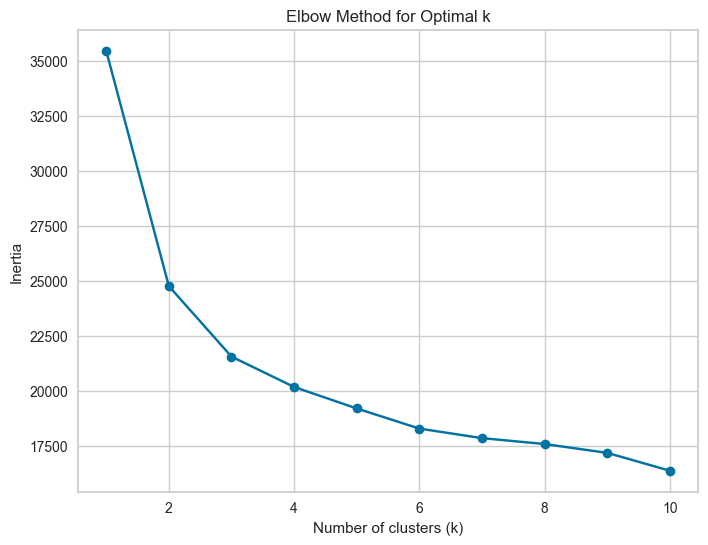

In [30]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Elbow method to find the optimal number of clusters
inertia = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_encoded[num_cols])
    inertia.append(kmeans.inertia_)

# Plotting the elbow curve
plt.figure(figsize=(8, 6))
plt.plot(K_range, inertia, 'bo-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.grid(True)
plt.show()

The elbow point in the plot suggests the optimal number of clusters (usually where the inertia starts to flatten).
**Here the optimal number of clusters is 4**

**2. Applying K-Means Clustering**

In [31]:
# Apply K-Means with optimal number of clusters (for example, k=4)
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
data_encoded['Cluster'] = kmeans.fit_predict(data_encoded[num_cols])

# Display the cluster assignments
data_encoded[['ID', 'Cluster']].head()

,ID,Cluster
0,5524,1
1,2174,2
2,4141,1
3,6182,0
4,5324,0


In [32]:
# Analyze clusters by taking the mean of each feature
cluster_analysis = data_encoded.groupby('Cluster').mean()
print(cluster_analysis)

                  ID  Year_Birth    Income   Kidhome  Teenhome  \
Cluster                                                          
0        5637.454707    0.808752 -0.896157  0.775217 -0.922443   
1        5625.129310   -0.037673  0.971936 -0.742739 -0.627914   
2        5547.495413   -0.455562 -0.396577  0.455408  0.838242   
3        5537.772727   -0.350749  0.297250 -0.480788  0.808113   

                          Dt_Customer   Recency  MntWines  MntFruits  \
Cluster                                                                
0       2013-07-21 08:36:39.644760064 -0.021487 -0.797837  -0.494776   
1       2013-07-10 02:33:55.862068992  0.010048  0.828317   1.091233   
2       2013-08-19 13:28:30.825688064  0.051677 -0.700513  -0.554036   
3       2013-05-18 21:54:32.727272704 -0.041467  0.663898  -0.099255   

         MntMeatProducts  ...  Education_Graduation  Education_Master  \
Cluster                   ...                                           
0              -0.619359

In [40]:
# Step 1: Reverse scaling for the numerical columns
data_encoded[num_cols] = scaler.inverse_transform(data_encoded[num_cols])

# Step 2: Check the data to ensure it's back to its original form
data_encoded[num_cols].head()

,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth
0,1957.0,58138.0,0.0,0.0,58.0,635.0,88.0,546.0,172.0,88.0,88.0,3.0,8.0,10.0,4.0,7.0
1,1954.0,46344.0,1.0,1.0,38.0,11.0,1.0,6.0,2.0,1.0,6.0,2.0,1.0,1.0,2.0,5.0
2,1965.0,71613.0,0.0,0.0,26.0,426.0,49.0,127.0,111.0,21.0,42.0,1.0,8.0,2.0,10.0,4.0
3,1984.0,26646.0,1.0,0.0,26.0,11.0,4.0,20.0,10.0,3.0,5.0,2.0,2.0,0.0,4.0,6.0
4,1981.0,58293.0,1.0,0.0,94.0,173.0,43.0,118.0,46.0,27.0,15.0,5.0,5.0,3.0,6.0,5.0


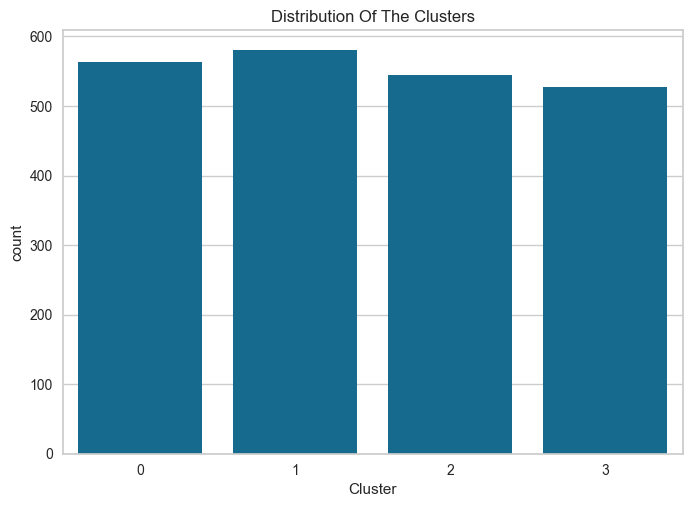

In [41]:
#Plotting countplot of clusters
pl = sns.countplot(x=data_encoded["Cluster"])
pl.set_title("Distribution Of The Clusters")
plt.show()

In [52]:
data_encoded.Cluster.value_counts()

Cluster
1    580
0    563
2    545
3    528
Name: count, dtype: int64

In [55]:
# Group by 'Cluster' and calculate the mean for each feature
cluster_profile = data_encoded.groupby('Cluster').mean()

# Display the cluster profiles
cluster_profile

,ID,Year_Birth,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,...,Education_Graduation,Education_Master,Education_PhD,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO
Cluster,,,,,,,,,,,,,,,,,,,,,
0,5637.454707,1978.511545,29693.316163,0.857904,0.003552,2013-07-21 08:36:39.644760064,48.390764,36.019538,6.671403,28.115453,...,0.509769,0.149201,0.140320,0.001776,0.081705,0.410302,0.262877,0.236234,0.007105,0.000000
1,5625.129310,1968.368966,76708.344828,0.043103,0.163793,2013-07-10 02:33:55.862068992,49.303448,584.443103,69.770690,452.377586,...,0.558621,0.139655,0.205172,0.000000,0.091379,0.356897,0.246552,0.260345,0.041379,0.000000
2,5547.495413,1963.361468,42266.442202,0.686239,0.961468,2013-08-19 13:28:30.825688064,50.508257,68.842202,4.313761,25.800000,...,0.471560,0.192661,0.238532,0.001835,0.117431,0.376147,0.170642,0.289908,0.044037,0.000000
3,5537.772727,1964.617424,59728.259470,0.183712,0.945076,2013-05-18 21:54:32.727272704,47.812500,528.992424,22.407197,147.337121,...,0.469697,0.179924,0.289773,0.001894,0.130682,0.405303,0.164773,0.248106,0.045455,0.003788


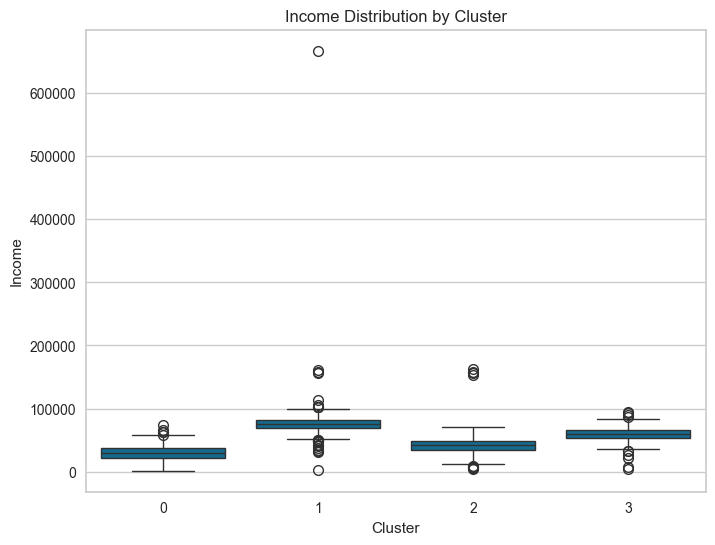

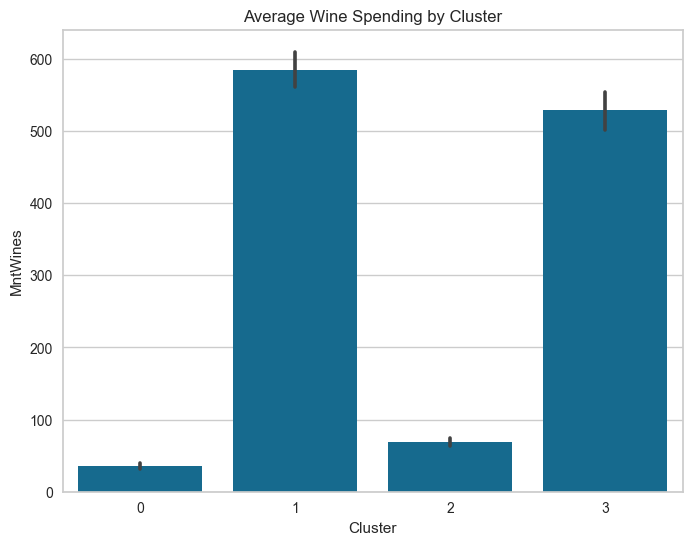

In [56]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualize income distribution across clusters
plt.figure(figsize=(8,6))
sns.boxplot(x='Cluster', y='Income', data=data_encoded)
plt.title('Income Distribution by Cluster')
plt.show()

# Visualize the average product purchase across clusters
plt.figure(figsize=(8,6))
sns.barplot(x='Cluster', y='MntWines', data=data_encoded)
plt.title('Average Wine Spending by Cluster')
plt.show()